In [11]:
import pandas as pd
df = pd.read_csv("./matches.csv")
df1 = df
df1.sort_values(by=['season'],inplace = True)
# df1 = df[df.season!=2019]
df1 = df1[(df.team1=="Mumbai Indians") | (df1.team2=="Mumbai Indians") ]

In [12]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
74,75,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
68,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN


In [13]:
df1.isnull().sum()

id                   0
season               0
city                 3
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            157
dtype: int64

In [14]:
df1[df1.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN


In [15]:
df1['city'].fillna('UAE',inplace=True)

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df1[df1.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [17]:
df1['winner'].fillna('DRAW',inplace=True)

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
df1[df1.player_of_match.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [19]:
df1['player_of_match'].fillna('NOBODY',inplace=True)

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
df1.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
df1.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            157
dtype: int64

In [22]:
def convert_to_number(input):
    res={}
    j=0
    for i in input:
        if i not in res.keys():
            j+=1
            res[i] = j
    return res

In [23]:
team_vector = {'DRAW':0}
team_vector.update(convert_to_number(df1.team1.append(df1.team2)))
toss_result_vector = convert_to_number(df1.toss_decision)
match_result_vector = convert_to_number(df1.result)
city_vector=convert_to_number(df1.city)
stadium_vector =convert_to_number(df1.venue)

In [24]:
team_counter=list(team_vector.values())
team_counter

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [25]:
team_vector
toss_result_vector
match_result_vector
stadium_vector
city_vector

{'Mumbai': 1,
 'Kolkata': 2,
 'Chandigarh': 3,
 'Chennai': 4,
 'Delhi': 5,
 'Hyderabad': 6,
 'Bangalore': 7,
 'Jaipur': 8,
 'East London': 9,
 'Port Elizabeth': 10,
 'Durban': 11,
 'Cape Town': 12,
 'Centurion': 13,
 'Johannesburg': 14,
 'Visakhapatnam': 15,
 'Pune': 16,
 'Dharamsala': 17,
 'UAE': 18,
 'Sharjah': 19,
 'Ahmedabad': 20,
 'Cuttack': 21,
 'Abu Dhabi': 22,
 'Kanpur': 23,
 'Indore': 24,
 'Rajkot': 25,
 'Bengaluru': 26,
 'Mohali': 27}

In [26]:
team_vector

{'DRAW': 0,
 'Mumbai Indians': 1,
 'Kolkata Knight Riders': 2,
 'Kings XI Punjab': 3,
 'Chennai Super Kings': 4,
 'Rajasthan Royals': 5,
 'Royal Challengers Bangalore': 6,
 'Deccan Chargers': 7,
 'Pune Warriors': 8,
 'Delhi Daredevils': 9,
 'Sunrisers Hyderabad': 10,
 'Rising Pune Supergiant': 11,
 'Gujarat Lions': 12,
 'Delhi Capitals': 13,
 'Kochi Tuskers Kerala': 14}

In [27]:
df1['team1'] = df1['team1'].apply(lambda x:team_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df1['team2'] = df1['team2'].apply(lambda x:team_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df1['toss_decision'] = df1['toss_decision'].apply(lambda x:toss_result_vector[x])
df1['winner'] = df1['winner'].apply(lambda x:team_vector[x])
df1['result'] = df1['result'].apply(lambda x:match_result_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [30]:
df1['toss_winner'] = df1['toss_winner'].apply(lambda x:team_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df1['city'] = df1['city'].apply(lambda x:city_vector[x])
df1['venue'] = df1['venue'].apply(lambda x:stadium_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
81,82,2008,1,2008-05-04,1,9,9,1,1,0,1,29,0,SM Pollock,1,IL Howell,RE Koertzen,NaN
74,75,2008,2,2008-04-29,2,1,2,2,1,0,1,0,7,ST Jayasuriya,2,BF Bowden,AV Jayaprakash,NaN
71,72,2008,1,2008-04-27,1,7,7,1,1,0,7,0,10,AC Gilchrist,1,Asad Rauf,SL Shastri,NaN
68,69,2008,3,2008-04-25,3,1,1,1,1,0,3,66,0,KC Sangakkara,3,Aleem Dar,AM Saheba,NaN
66,67,2008,4,2008-04-23,4,1,1,1,1,0,4,6,0,ML Hayden,4,DJ Harper,GA Pratapkumar,NaN


In [33]:
def convert_to_number_based_on_count(input):
    res={}
    for i in input:
        if i not in res.keys():
            res[i] = 1
        else:
            res[i]+=1
    return res

In [34]:
pom_count=convert_to_number_based_on_count(df1.player_of_match)
pom_vector = {'NOBODY':0}
pom_vector.update(convert_to_number(df1.player_of_match))

In [35]:
df1['player_of_match'] = df1['player_of_match'].apply(lambda x:pom_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
81,82,2008,1,2008-05-04,1,9,9,1,1,0,1,29,0,1,1,IL Howell,RE Koertzen,NaN
74,75,2008,2,2008-04-29,2,1,2,2,1,0,1,0,7,2,2,BF Bowden,AV Jayaprakash,NaN
71,72,2008,1,2008-04-27,1,7,7,1,1,0,7,0,10,3,1,Asad Rauf,SL Shastri,NaN
68,69,2008,3,2008-04-25,3,1,1,1,1,0,3,66,0,4,3,Aleem Dar,AM Saheba,NaN
66,67,2008,4,2008-04-23,4,1,1,1,1,0,4,6,0,5,4,DJ Harper,GA Pratapkumar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,11145,2019,27,30/03/19,1,3,3,1,1,0,3,0,8,84,33,Vineet Kulkarni,Chris Gaffaney,Anil Chaudhary
714,11310,2019,6,06/04/19,1,10,10,1,1,0,1,40,0,85,34,Anil Dandekar,Nitin Menon,Marais Erasmus
719,11315,2019,1,10/04/19,3,1,1,1,1,0,1,0,3,25,5,Yeshwant Barde,S Ravi,O Nandan
722,11318,2019,1,13/04/19,1,5,5,1,1,0,5,0,4,69,5,Nitin Menon,Nanda Kishore,Marais Erasmus


In [37]:
df_work = df1.drop(['id','season','date','win_by_runs','win_by_wickets','player_of_match', 'umpire1','umpire2','umpire3'], axis = 1)

In [38]:
df_work.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,venue
81,1,1,9,9,1,1,0,1,1
74,2,2,1,2,2,1,0,1,2
71,1,1,7,7,1,1,0,7,1
68,3,3,1,1,1,1,0,3,3
66,4,4,1,1,1,1,0,4,4


In [39]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 81 to 755
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   city           187 non-null    int64
 1   team1          187 non-null    int64
 2   team2          187 non-null    int64
 3   toss_winner    187 non-null    int64
 4   toss_decision  187 non-null    int64
 5   result         187 non-null    int64
 6   dl_applied     187 non-null    int64
 7   winner         187 non-null    int64
 8   venue          187 non-null    int64
dtypes: int64(9)
memory usage: 14.6 KB


In [40]:
df_work.shape

(187, 9)

In [41]:
df_work.describe()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,venue
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.0,187.000000,187.000000
mean,5.572193,3.085561,3.764706,3.422460,1.406417,1.010695,0.0,3.219251,9.106952
std,6.439869,3.048560,3.346999,3.232584,0.492483,0.103139,0.0,3.305267,7.768790
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,5.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.0,1.000000,5.000000
75%,7.000000,4.000000,6.000000,5.000000,2.000000,1.000000,0.0,5.000000,11.000000
max,27.000000,13.000000,14.000000,14.000000,2.000000,2.000000,0.0,14.000000,34.000000


In [42]:
train_df_x, train_df_y = df_work, df_work.winner
train_df_x.drop('winner',axis=1,inplace=True)

In [43]:
train_df_x.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,venue
81,1,1,9,9,1,1,0,1
74,2,2,1,2,2,1,0,2
71,1,1,7,7,1,1,0,1
68,3,3,1,1,1,1,0,3
66,4,4,1,1,1,1,0,4


In [44]:
train_df_x['match_result'] = train_df_y

In [45]:
import numpy as np
def create_soft_max_matrix(input_list,rows,column):
    out_list = np.zeros((rows, column))
    index =0
    for item in input_list:
        
        out_list[index][item] =1
        index+=1
    
    return out_list      
        

In [46]:
team_counter

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [47]:
output_vector = create_soft_max_matrix(team_counter,len(team_counter),len(team_counter))

In [48]:
pd.Series(output_vector[0])

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
dtype: float64

In [49]:
import pandas as pd
mylist = output_vector[0]
out_df = pd.DataFrame()
for item in train_df_y:
    out_df = out_df.append(pd.Series(output_vector[item]),ignore_index=True)
out_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
out_df.shape

(187, 15)

In [51]:
out_values = out_df.values

In [52]:
out_values

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [53]:
train_df_x.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,venue,match_result
81,1,1,9,9,1,1,0,1,1
74,2,2,1,2,2,1,0,2,1
71,1,1,7,7,1,1,0,1,7
68,3,3,1,1,1,1,0,3,3
66,4,4,1,1,1,1,0,4,4


In [54]:
values= train_df_x.values

In [55]:
values

array([[ 1,  1,  9, ...,  0,  1,  1],
       [ 2,  2,  1, ...,  0,  2,  1],
       [ 1,  1,  7, ...,  0,  1,  7],
       ...,
       [ 1,  3,  1, ...,  0,  5,  1],
       [ 1,  1,  5, ...,  0,  5,  5],
       [ 6,  1,  4, ...,  0, 34,  1]])

In [56]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [57]:
# from sklearn.preprocessing import MinMaxScaler
# scaler_x = MinMaxScaler(feature_range=(0, 1))
# scaled_x = scaler_x.fit_transform(values)

In [58]:
# reframed = series_to_supervised(values, 1, 1)
# reframed.drop(reframed.columns[[12,13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)

In [59]:
scaled = values #reframed.values

In [60]:
n_train_time = 171
train = scaled[:n_train_time, :]
test = scaled[n_train_time:, :]
train_out = out_values[:n_train_time, :]
test_out = out_values[n_train_time:, :]

In [61]:
train_X, train_y = train[:, :-1], train_out[:,:]
test_X, test_y = test[:, :-1], test_out[:, :]

In [62]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [63]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(171, 1, 8) (171, 15) (16, 1, 8) (16, 15)


In [64]:
#!pip install sklearn

In [65]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
#!pip install tensorflow

In [67]:
## for Deep-learing:
import keras
from keras.layers import Activation,Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [68]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True, dropout=1.))#
model.add(LSTM(15, dropout=1.))
# model.add(Dense(1))
# model.add(TimeDistributed(Dense(train_y.shape[1], activation='softmax')))
model.add(Activation('softmax'))
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss      =  'categorical_crossentropy',
                   optimizer =  'adam',
                   metrics   =  ['acc'])

In [69]:
# from keras.optimizers import Adam
# timesteps=1
# features = 12
# # define model architecture - using a two-layer LSTM with 128 LSTM cells in each layer
# model = Sequential()
# model.add(LSTM(128, input_shape=(timesteps, features), return_sequences=True, dropout=1.0))
# model.add(LSTM(128, dropout=1.0))
# model.add(Dense(1, activation = "softmax"))

# optimizer = Adam(lr=0.01)
# model.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['acc'])

In [70]:
# fit network
history = model.fit(train_X, train_y, epochs=256, batch_size=2, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 171 samples, validate on 16 samples
Epoch 1/256
 - 1s - loss: 2.4255 - acc: 0.5439 - val_loss: 2.0616 - val_acc: 0.6875
Epoch 2/256
 - 0s - loss: 2.1178 - acc: 0.5731 - val_loss: 1.9882 - val_acc: 0.6875
Epoch 3/256
 - 0s - loss: 2.0756 - acc: 0.5731 - val_loss: 1.9408 - val_acc: 0.6875
Epoch 4/256
 - 0s - loss: 2.0572 - acc: 0.5731 - val_loss: 1.9116 - val_acc: 0.6875
Epoch 5/256
 - 0s - loss: 2.0473 - acc: 0.5731 - val_loss: 1.8968 - val_acc: 0.6875
Epoch 6/256
 - 0s - loss: 2.0401 - acc: 0.5731 - val_loss: 1.8887 - val_acc: 0.6875
Epoch 7/256
 - 0s - loss: 2.0338 - acc: 0.5731 - val_loss: 1.8842 - val_acc: 0.6875
Epoch 8/256
 - 0s - loss: 2.0276 - acc: 0.5731 - val_loss: 1.8826 - val_acc: 0.6875
Epoch 9/256
 - 0s - loss: 2.0211 - acc: 0.5731 - val_loss: 1.8841 - val_acc: 0.6875
Epoch 10/256
 - 0s - loss: 2.0139 - acc: 0.5731 - val_loss: 1.8892 - val_acc: 0.6875
Epoch 11/256
 - 0s - loss: 2.0049 - acc: 0.5731 - val_loss: 1.8933 - val_acc: 0.6875
Epoch 12/256
 - 0s - loss: 1.

Epoch 97/256
 - 0s - loss: 1.7715 - acc: 0.5731 - val_loss: 1.8251 - val_acc: 0.6875
Epoch 98/256
 - 0s - loss: 1.7717 - acc: 0.5731 - val_loss: 1.8159 - val_acc: 0.6875
Epoch 99/256
 - 0s - loss: 1.7698 - acc: 0.5731 - val_loss: 1.8249 - val_acc: 0.6875
Epoch 100/256
 - 0s - loss: 1.7698 - acc: 0.5731 - val_loss: 1.8165 - val_acc: 0.6875
Epoch 101/256
 - 0s - loss: 1.7682 - acc: 0.5731 - val_loss: 1.8246 - val_acc: 0.6875
Epoch 102/256
 - 0s - loss: 1.7681 - acc: 0.5731 - val_loss: 1.8160 - val_acc: 0.6875
Epoch 103/256
 - 0s - loss: 1.7666 - acc: 0.5731 - val_loss: 1.8242 - val_acc: 0.6875
Epoch 104/256
 - 0s - loss: 1.7663 - acc: 0.5731 - val_loss: 1.8161 - val_acc: 0.6875
Epoch 105/256
 - 0s - loss: 1.7645 - acc: 0.5731 - val_loss: 1.8245 - val_acc: 0.6875
Epoch 106/256
 - 0s - loss: 1.7631 - acc: 0.5731 - val_loss: 1.8117 - val_acc: 0.6875
Epoch 107/256
 - 0s - loss: 1.7616 - acc: 0.5731 - val_loss: 1.8197 - val_acc: 0.6875
Epoch 108/256
 - 0s - loss: 1.7604 - acc: 0.5731 - val_lo

Epoch 193/256
 - 0s - loss: 1.7267 - acc: 0.5731 - val_loss: 1.7629 - val_acc: 0.6875
Epoch 194/256
 - 0s - loss: 1.7270 - acc: 0.5731 - val_loss: 1.7814 - val_acc: 0.6875
Epoch 195/256
 - 0s - loss: 1.7260 - acc: 0.5731 - val_loss: 1.7682 - val_acc: 0.6875
Epoch 196/256
 - 0s - loss: 1.7271 - acc: 0.5731 - val_loss: 1.8081 - val_acc: 0.6875
Epoch 197/256
 - 0s - loss: 1.7637 - acc: 0.5848 - val_loss: 1.8081 - val_acc: 0.6875
Epoch 198/256
 - 0s - loss: 1.7656 - acc: 0.5731 - val_loss: 1.7903 - val_acc: 0.6250
Epoch 199/256
 - 0s - loss: 1.7490 - acc: 0.5848 - val_loss: 1.7692 - val_acc: 0.6875
Epoch 200/256
 - 0s - loss: 1.7345 - acc: 0.5789 - val_loss: 1.7629 - val_acc: 0.6875
Epoch 201/256
 - 0s - loss: 1.7276 - acc: 0.5789 - val_loss: 1.7600 - val_acc: 0.6875
Epoch 202/256
 - 0s - loss: 1.7265 - acc: 0.5731 - val_loss: 1.7613 - val_acc: 0.6875
Epoch 203/256
 - 0s - loss: 1.7254 - acc: 0.5731 - val_loss: 1.7614 - val_acc: 0.6875
Epoch 204/256
 - 0s - loss: 1.7253 - acc: 0.5731 - val

In [71]:
# fit model
# model.fit(train_X, train_y, batch_size=2, epochs=120)

In [72]:
# preds = model.predict(test_X, verbose=0)[0]

In [73]:
# preds[0]

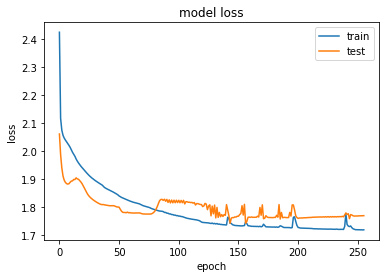

In [74]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [75]:
# define function to sample next word from a probability array based on temperature
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [76]:
team_counter

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [77]:
# team_vector
def get_key(val): 
    for key, value in team_vector.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

In [82]:
yhat = model.predict(test_X)
for item in yhat:
    print(get_key(team_counter[sample(item,1)]))


Chennai Super Kings
Mumbai Indians
Delhi Capitals
DRAW
Kolkata Knight Riders
Chennai Super Kings
Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Mumbai Indians
Rajasthan Royals
Deccan Chargers
Deccan Chargers
Chennai Super Kings
Chennai Super Kings
Mumbai Indians


In [83]:
yhat

array([[0.04630539, 0.21239479, 0.04630539, 0.04630552, 0.1856336 ,
        0.0463066 , 0.0463054 , 0.04630539, 0.04630539, 0.04630548,
        0.04630547, 0.04630539, 0.04630539, 0.04630539, 0.0463054 ],
       [0.04514588, 0.2070763 , 0.04514588, 0.04514588, 0.04514589,
        0.20602669, 0.04514589, 0.04514589, 0.04514588, 0.04514652,
        0.04514588, 0.04514588, 0.04514588, 0.04514588, 0.04514588],
       [0.05171748, 0.23721907, 0.05171748, 0.05171748, 0.05171748,
        0.09035069, 0.0517175 , 0.05171748, 0.05171748, 0.05180778,
        0.05172995, 0.05171768, 0.05171748, 0.05171748, 0.0517175 ],
       [0.04102047, 0.18815374, 0.1843674 , 0.0884002 , 0.08785302,
        0.04102048, 0.04102051, 0.04102093, 0.04102048, 0.04102046,
        0.04102047, 0.04102047, 0.04102046, 0.04102047, 0.04102047],
       [0.05379396, 0.24674356, 0.05379396, 0.05379396, 0.05379396,
        0.05379404, 0.05379397, 0.05379416, 0.05379396, 0.053797  ,
        0.05379412, 0.05393146, 0.05379396, 

In [391]:
df2 = pd.read_csv("./deliveries.csv")
df3 = df2[df2.match_id.isin(df1.id)]

In [4]:
df3

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165208,11139,1,Delhi Capitals,Mumbai Indians,1,1,P Shaw,S Dhawan,R Salam,0,...,0,0,1,0,2,1,3,NaN,NaN,NaN
165209,11139,1,Delhi Capitals,Mumbai Indians,1,2,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165210,11139,1,Delhi Capitals,Mumbai Indians,1,3,P Shaw,S Dhawan,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165211,11139,1,Delhi Capitals,Mumbai Indians,1,4,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165212,11139,1,Delhi Capitals,Mumbai Indians,1,5,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
